In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LogNorm
import math

In [2]:
df = pd.read_csv('foodflow_data.csv')

In [3]:
df

,sctg_1,sctg_2,sctg_3,sctg_4,sctg_5,sctg_6,sctg_7,total,ori,des
0,0.000000e+00,0.0000,0.000000,4.763500e+04,149048.6442,0.0,40.262859,1.967239e+05,1001,1001
1,2.030100e+07,0.0000,0.000000,1.106758e+07,0.0000,0.0,0.000000,3.136858e+07,1001,1007
2,2.646100e+00,208558.0882,0.000000,6.272792e+07,219073.8700,0.0,21525.787040,6.317708e+07,1001,1021
3,0.000000e+00,0.0000,0.000000,8.156041e+06,0.0000,0.0,0.000000,8.156041e+06,1001,1037
4,0.000000e+00,0.0000,0.000000,0.000000e+00,0.0000,0.0,3400.448878,3.400449e+03,1001,1047
...,...,...,...,...,...,...,...,...,...,...
161389,0.000000e+00,0.0000,2.055448,5.196786e+05,0.0000,0.0,0.000000,5.196806e+05,56045,56011
161390,3.357975e+06,0.0000,0.000000,0.000000e+00,0.0000,0.0,0.000000,3.357975e+06,56045,56015
161391,3.253301e+03,0.0000,0.000000,0.000000e+00,0.0000,0.0,0.000000,3.253301e+03,56045,56019
161392,1.147379e+06,0.0000,0.000000,0.000000e+00,0.0000,0.0,0.000000,1.147379e+06,56045,56027


In [4]:
df_latlong = pd.read_csv('fips_latlong.csv')

In [5]:
df_latlong

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148
4,AL,1009,161530,Blount County,1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440
...,...,...,...,...,...,...,...,...,...,...
3215,PR,72145,1804553,Vega Baja Municipio,1.187451e+08,57827590,45.848,22.327,18.455128,-66.397883
3216,PR,72147,1804554,Vieques Municipio,1.315414e+08,552192819,50.788,213.203,18.125418,-65.432474
3217,PR,72149,1804555,Villalba Municipio,9.229857e+07,3622639,35.637,1.399,18.130718,-66.472244
3218,PR,72151,1804556,Yabucoa Municipio,1.430052e+08,72592516,55.215,28.028,18.059858,-65.859871


In [6]:
df_latlong.drop(['NAME','ANSICODE','ALAND','AWATER','ALAND_SQMI','AWATER_SQMI'], axis=1,inplace=True)

In [7]:
df_latlong

,USPS,GEOID,INTPTLAT,INTPTLONG
0,AL,1001,32.532237,-86.646440
1,AL,1003,30.659218,-87.746067
2,AL,1005,31.870253,-85.405104
3,AL,1007,33.015893,-87.127148
4,AL,1009,33.977358,-86.566440
...,...,...,...,...
3215,PR,72145,18.455128,-66.397883
3216,PR,72147,18.125418,-65.432474
3217,PR,72149,18.130718,-66.472244
3218,PR,72151,18.059858,-65.859871


In [8]:
df_latlong = df_latlong.loc[df_latlong['USPS'].isin(['CA','NV','AZ'])]

In [9]:
df_latlongca = df_latlong.loc[df_latlong['USPS']=='CA']

In [10]:
df_latlong

,USPS,GEOID,INTPTLAT,INTPTLONG
96,AZ,4001,35.385084,-109.490172
97,AZ,4003,31.840129,-109.775163
98,AZ,4005,35.829692,-111.773728
99,AZ,4007,33.789618,-110.811870
100,AZ,4009,32.931828,-109.878310
...,...,...,...,...
1759,NV,32027,40.439639,-118.409477
1760,NV,32029,39.438385,-119.524646
1761,NV,32031,40.731320,-119.663269
1762,NV,32033,39.418234,-114.900605


In [11]:
df_latlongca

,USPS,GEOID,INTPTLAT,INTPTLONG
186,CA,6001,37.647139,-121.912488
187,CA,6003,38.621783,-119.798352
188,CA,6005,38.443550,-120.653856
189,CA,6007,39.665959,-121.601919
190,CA,6009,38.183900,-120.561441
191,CA,6011,39.177739,-122.237563
192,CA,6013,37.919479,-121.951543
193,CA,6015,41.763958,-124.003614
194,CA,6017,38.785612,-120.534225
195,CA,6019,36.761006,-119.655019


In [12]:
df = df.drop(['sctg_1','sctg_2','sctg_3','sctg_4','sctg_5','sctg_6','sctg_7'], axis=1)

In [13]:
df

,total,ori,des
0,1.967239e+05,1001,1001
1,3.136858e+07,1001,1007
2,6.317708e+07,1001,1021
3,8.156041e+06,1001,1037
4,3.400449e+03,1001,1047
...,...,...,...
161389,5.196806e+05,56045,56011
161390,3.357975e+06,56045,56015
161391,3.253301e+03,56045,56019
161392,1.147379e+06,56045,56027


In [14]:
df.rename(columns={'des': 'GEOID'}, inplace=True)

In [15]:
df

,total,ori,GEOID
0,1.967239e+05,1001,1001
1,3.136858e+07,1001,1007
2,6.317708e+07,1001,1021
3,8.156041e+06,1001,1037
4,3.400449e+03,1001,1047
...,...,...,...
161389,5.196806e+05,56045,56011
161390,3.357975e+06,56045,56015
161391,3.253301e+03,56045,56019
161392,1.147379e+06,56045,56027


In [16]:
df = pd.merge(df_latlong, df)

In [17]:
df

,USPS,GEOID,INTPTLAT,INTPTLONG,total,ori
0,AZ,4001,35.385084,-109.490172,4.380899e+03,4012
1,AZ,4001,35.385084,-109.490172,1.433095e+08,4017
2,AZ,4001,35.385084,-109.490172,1.831777e+05,4025
3,AZ,4001,35.385084,-109.490172,2.495926e+02,5015
4,AZ,4001,35.385084,-109.490172,2.848654e+06,5097
...,...,...,...,...,...,...
9672,NV,32510,39.153060,-119.747368,8.414223e+02,47079
9673,NV,32510,39.153060,-119.747368,1.096909e+06,49005
9674,NV,32510,39.153060,-119.747368,7.572405e+04,49021
9675,NV,32510,39.153060,-119.747368,1.449842e+05,51085


In [18]:
df.columns = df.columns.str.strip()

In [19]:
df

,USPS,GEOID,INTPTLAT,INTPTLONG,total,ori
0,AZ,4001,35.385084,-109.490172,4.380899e+03,4012
1,AZ,4001,35.385084,-109.490172,1.433095e+08,4017
2,AZ,4001,35.385084,-109.490172,1.831777e+05,4025
3,AZ,4001,35.385084,-109.490172,2.495926e+02,5015
4,AZ,4001,35.385084,-109.490172,2.848654e+06,5097
...,...,...,...,...,...,...
9672,NV,32510,39.153060,-119.747368,8.414223e+02,47079
9673,NV,32510,39.153060,-119.747368,1.096909e+06,49005
9674,NV,32510,39.153060,-119.747368,7.572405e+04,49021
9675,NV,32510,39.153060,-119.747368,1.449842e+05,51085


In [20]:
df.rename(columns={'GEOID':'des','INTPTLAT':'des_lat','INTPTLONG':'des_long', 'USPS':'USPS_des'}, inplace=True)

In [21]:
df

,USPS_des,des,des_lat,des_long,total,ori
0,AZ,4001,35.385084,-109.490172,4.380899e+03,4012
1,AZ,4001,35.385084,-109.490172,1.433095e+08,4017
2,AZ,4001,35.385084,-109.490172,1.831777e+05,4025
3,AZ,4001,35.385084,-109.490172,2.495926e+02,5015
4,AZ,4001,35.385084,-109.490172,2.848654e+06,5097
...,...,...,...,...,...,...
9672,NV,32510,39.153060,-119.747368,8.414223e+02,47079
9673,NV,32510,39.153060,-119.747368,1.096909e+06,49005
9674,NV,32510,39.153060,-119.747368,7.572405e+04,49021
9675,NV,32510,39.153060,-119.747368,1.449842e+05,51085


In [22]:
df.rename(columns={'ori': 'GEOID'}, inplace=True)

In [23]:
df = pd.merge(df_latlongca, df, on='GEOID')

In [24]:
df

,USPS,GEOID,INTPTLAT,INTPTLONG,USPS_des,des,des_lat,des_long,total
0,CA,6001,37.647139,-121.912488,AZ,4013,33.345176,-112.498930,2.237798e+07
1,CA,6001,37.647139,-121.912488,AZ,4015,35.717705,-113.749689,3.294102e+01
2,CA,6001,37.647139,-121.912488,AZ,4021,32.918521,-111.366340,6.690776e+05
3,CA,6001,37.647139,-121.912488,CA,6001,37.647139,-121.912488,2.321623e+08
4,CA,6001,37.647139,-121.912488,CA,6005,38.443550,-120.653856,2.924863e+06
...,...,...,...,...,...,...,...,...,...
1522,CA,6115,39.270130,-121.344259,CA,6099,37.562316,-121.002831,1.023769e+07
1523,CA,6115,39.270130,-121.344259,CA,6101,39.036190,-121.703940,9.288667e+08
1524,CA,6115,39.270130,-121.344259,CA,6111,34.358741,-119.133143,1.446178e+02
1525,CA,6115,39.270130,-121.344259,CA,6115,39.270130,-121.344259,2.670468e+06


In [25]:
df.columns = df.columns.str.strip()

In [26]:
df.rename(columns={'GEOID': 'ori','INTPTLAT': 'ori_lat','INTPTLONG': 'ori_long', 'USPS': 'USPS_ori'}, inplace=True)

In [27]:
df

,USPS_ori,ori,ori_lat,ori_long,USPS_des,des,des_lat,des_long,total
0,CA,6001,37.647139,-121.912488,AZ,4013,33.345176,-112.498930,2.237798e+07
1,CA,6001,37.647139,-121.912488,AZ,4015,35.717705,-113.749689,3.294102e+01
2,CA,6001,37.647139,-121.912488,AZ,4021,32.918521,-111.366340,6.690776e+05
3,CA,6001,37.647139,-121.912488,CA,6001,37.647139,-121.912488,2.321623e+08
4,CA,6001,37.647139,-121.912488,CA,6005,38.443550,-120.653856,2.924863e+06
...,...,...,...,...,...,...,...,...,...
1522,CA,6115,39.270130,-121.344259,CA,6099,37.562316,-121.002831,1.023769e+07
1523,CA,6115,39.270130,-121.344259,CA,6101,39.036190,-121.703940,9.288667e+08
1524,CA,6115,39.270130,-121.344259,CA,6111,34.358741,-119.133143,1.446178e+02
1525,CA,6115,39.270130,-121.344259,CA,6115,39.270130,-121.344259,2.670468e+06


In [28]:
ori_long_list = df['ori_long'].tolist()
ori_lat_list = df['ori_lat'].tolist()
des_long_list = df['des_long'].tolist()
des_lat_list = df['des_lat'].tolist()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


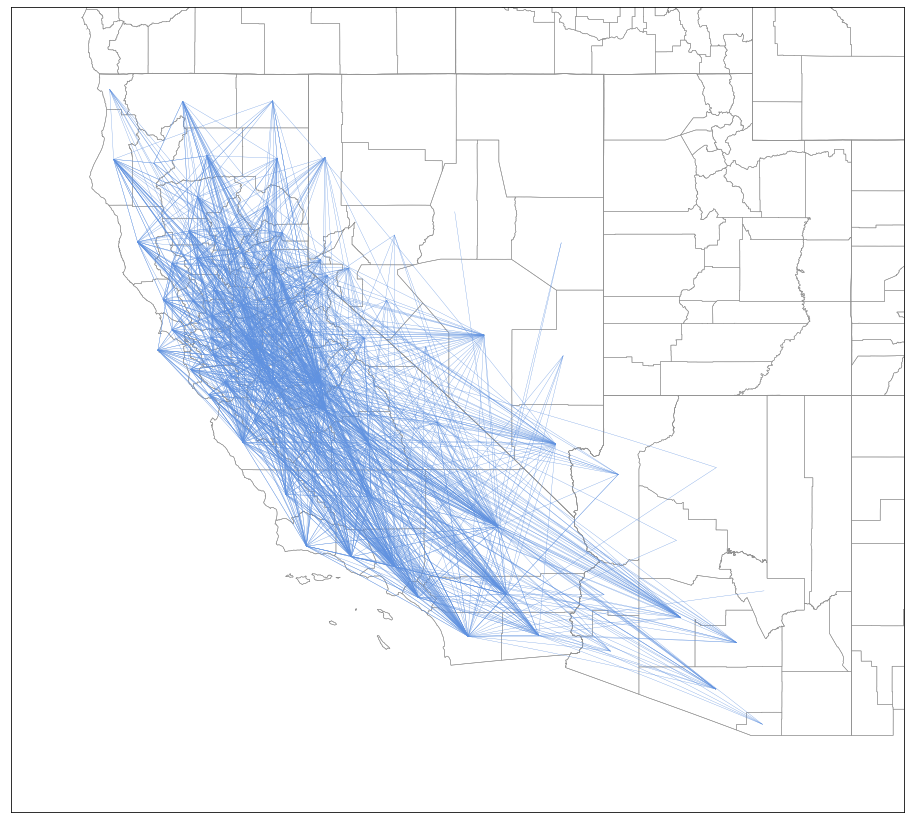

In [29]:
plt.figure(figsize=(16, 16))
m = Basemap(resolution='h', llcrnrlon = -126, urcrnrlon = -108, lon_0 = -117,
            llcrnrlat = 30, urcrnrlat = 43, lat_0 = 37, projection='merc')
shp_info = m.readshapefile('cb_2018_us_state_500k/cb_2018_us_state_500k', 'states', 
                            drawbounds=True, color='#8f8f8f')
shp_info = m.readshapefile('cb_2018_us_county_500k/cb_2018_us_county_500k','counties', 
                            drawbounds=True, color='#8f8f8f')
for i in range(len(ori_long_list)):
    startlat = ori_lat_list[i]; startlong = ori_long_list[i]
    arrlat = des_lat_list[i]; arrlong = des_long_list[i]
    m.drawgreatcircle(startlong, startlat, arrlong, arrlat, linewidth=0.3, color='#6092e0')
    
plt.show()

In [30]:
df_names = pd.read_csv('cb_2018_us_county_500k.csv')

In [31]:
df_names
df_names.drop(['STATEFP','COUNTYFP','COUNTYNS','AFFGEOID','LSAD','ALAND','AWATER'], axis=1,inplace=True)

In [32]:
df_names

,GEOID,NAME
0,21007,Ballard
1,21017,Bourbon
2,21031,Butler
3,21065,Estill
4,21069,Fleming
...,...,...
3228,31073,Gosper
3229,39075,Holmes
3230,48171,Gillespie
3231,55079,Milwaukee


In [33]:
df = df.drop(df[df.des > 6111].index)
df = df.drop(df[df.des < 6001].index)

In [34]:
df

,USPS_ori,ori,ori_lat,ori_long,USPS_des,des,des_lat,des_long,total
3,CA,6001,37.647139,-121.912488,CA,6001,37.647139,-121.912488,2.321623e+08
4,CA,6001,37.647139,-121.912488,CA,6005,38.443550,-120.653856,2.924863e+06
5,CA,6001,37.647139,-121.912488,CA,6009,38.183900,-120.561441,7.782517e+05
6,CA,6001,37.647139,-121.912488,CA,6011,39.177739,-122.237563,6.931113e+06
7,CA,6001,37.647139,-121.912488,CA,6013,37.919479,-121.951543,1.570074e+09
...,...,...,...,...,...,...,...,...,...
1520,CA,6115,39.270130,-121.344259,CA,6089,40.760514,-122.043556,1.753668e+04
1521,CA,6115,39.270130,-121.344259,CA,6091,39.576925,-120.521993,5.463542e+06
1522,CA,6115,39.270130,-121.344259,CA,6099,37.562316,-121.002831,1.023769e+07
1523,CA,6115,39.270130,-121.344259,CA,6101,39.036190,-121.703940,9.288667e+08


In [35]:
df.rename(columns={'des': 'GEOID'}, inplace=True)
df = pd.merge(df_names, df, on='GEOID')
df.rename(columns={'GEOID': 'des','NAME': 'des_name'}, inplace=True)

In [36]:
df

,des,des_name,USPS_ori,ori,ori_lat,ori_long,USPS_des,des_lat,des_long,total
0,6001,Alameda,CA,6001,37.647139,-121.912488,CA,37.647139,-121.912488,2.321623e+08
1,6001,Alameda,CA,6009,38.183900,-120.561441,CA,37.647139,-121.912488,9.916832e+04
2,6001,Alameda,CA,6011,39.177739,-122.237563,CA,37.647139,-121.912488,1.214379e+02
3,6001,Alameda,CA,6013,37.919479,-121.951543,CA,37.647139,-121.912488,1.167863e+09
4,6001,Alameda,CA,6019,36.761006,-119.655019,CA,37.647139,-121.912488,4.218267e+07
...,...,...,...,...,...,...,...,...,...,...
1208,6065,Riverside,CA,6099,37.562316,-121.002831,CA,33.729828,-116.002239,2.375687e+01
1209,6065,Riverside,CA,6107,36.228834,-118.781055,CA,33.729828,-116.002239,4.123588e+05
1210,6065,Riverside,CA,6111,34.358741,-119.133143,CA,33.729828,-116.002239,3.995040e+07
1211,6065,Riverside,CA,6113,38.679596,-121.902441,CA,33.729828,-116.002239,2.038381e+07


In [37]:
df.rename(columns={'ori': 'GEOID'}, inplace=True)
df = pd.merge(df_names, df, on='GEOID')
df.rename(columns={'GEOID': 'ori','NAME': 'ori_name'}, inplace=True)

In [38]:
df

,ori,ori_name,des,des_name,USPS_ori,ori_lat,ori_long,USPS_des,des_lat,des_long,total
0,6001,Alameda,6001,Alameda,CA,37.647139,-121.912488,CA,37.647139,-121.912488,2.321623e+08
1,6001,Alameda,6005,Amador,CA,37.647139,-121.912488,CA,38.443550,-120.653856,2.924863e+06
2,6001,Alameda,6013,Contra Costa,CA,37.647139,-121.912488,CA,37.919479,-121.951543,1.570074e+09
3,6001,Alameda,6019,Fresno,CA,37.647139,-121.912488,CA,36.761006,-119.655019,3.812647e+05
4,6001,Alameda,6033,Lake,CA,37.647139,-121.912488,CA,39.094802,-122.746757,2.063792e+07
...,...,...,...,...,...,...,...,...,...,...,...
1208,6065,Riverside,6087,Santa Cruz,CA,33.729828,-116.002239,CA,37.012488,-122.007205,2.013242e+06
1209,6065,Riverside,6029,Kern,CA,33.729828,-116.002239,CA,35.346629,-118.729506,1.709847e+04
1210,6065,Riverside,6071,San Bernardino,CA,33.729828,-116.002239,CA,34.857220,-116.181197,1.429080e+09
1211,6065,Riverside,6017,El Dorado,CA,33.729828,-116.002239,CA,38.785612,-120.534225,8.591910e+07


In [39]:
ca_matrix = df.pivot_table(index='ori_name', columns='des_name', values='total', aggfunc='sum')

In [40]:
ca_matrix

des_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura
ori_name,,,,,,,,,,,,,,,,,,,,,
Alameda,2.321623e+08,NaN,2.924863e+06,NaN,7.782517e+05,6.931113e+06,1.570074e+09,NaN,NaN,3.812647e+05,...,NaN,1.527449e+01,NaN,5.053195e+07,NaN,NaN,NaN,NaN,1.295893e+06,1.429688e+08
Alpine,NaN,1.575331e+07,2.812926e+03,NaN,1.035350e+08,NaN,NaN,NaN,1.042878e+08,2.647409e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amador,NaN,1.105947e+08,3.206086e+08,NaN,3.409656e+08,NaN,NaN,NaN,7.287846e+08,4.034319e+06,...,NaN,NaN,NaN,1.579610e+08,3.050533e+06,NaN,NaN,NaN,2.413406e+05,NaN
Butte,NaN,NaN,2.845776e+03,1.874831e+08,3.393399e+07,1.041927e+07,NaN,NaN,1.015867e+05,6.044399e+05,...,NaN,2.002571e+05,NaN,6.354134e+01,9.193622e+07,6.080865e+07,NaN,NaN,NaN,NaN
Calaveras,9.916832e+04,1.310181e+06,1.665912e+08,NaN,3.510238e+08,NaN,NaN,NaN,3.975220e+08,5.440174e+07,...,NaN,NaN,NaN,4.461230e+07,NaN,NaN,NaN,NaN,2.583675e+08,3.834104e+01
Colusa,1.214379e+02,NaN,NaN,6.860410e+07,NaN,1.896595e+08,NaN,NaN,NaN,8.298800e+06,...,1.724503e+04,6.311348e+07,1.865766e+07,3.311917e+04,5.028015e+08,1.671062e+07,NaN,1.978563e+04,NaN,1.784719e+03
Contra Costa,1.167863e+09,NaN,1.023933e+03,NaN,2.572867e+06,9.398140e+06,1.341547e+08,NaN,NaN,3.067689e+06,...,NaN,8.518133e+07,NaN,1.513749e+08,NaN,NaN,NaN,NaN,3.700861e+07,1.916572e+07
Del Norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.420456e+07,NaN,NaN,...,NaN,NaN,NaN,1.164298e+05,NaN,NaN,NaN,NaN,NaN,7.662759e+07
El Dorado,NaN,1.369180e+08,7.406531e+07,NaN,1.773415e+00,2.883842e+06,NaN,NaN,NaN,8.665485e+06,...,NaN,NaN,NaN,3.094810e+06,NaN,3.983299e+01,NaN,NaN,NaN,1.423821e+03


In [41]:
ca_matrix.to_csv('ca_matrix.csv')

In [42]:
ca_matrix = ca_matrix.fillna(0)
ca_matrix = ca_matrix+1
np.fill_diagonal(ca_matrix.values, 1)

In [43]:
ca_matrix

des_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura
ori_name,,,,,,,,,,,,,,,,,,,,,
Alameda,1.000000e+00,1.000000e+00,2.924864e+06,1.000000e+00,7.782527e+05,6.931114e+06,1.570074e+09,1.000000e+00,1.000000e+00,3.812657e+05,...,1.000000e+00,1.627449e+01,1.000000e+00,5.053195e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.295894e+06,1.429688e+08
Alpine,1.000000e+00,1.000000e+00,2.813926e+03,1.000000e+00,1.035350e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.042878e+08,2.647410e+06,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Amador,1.000000e+00,1.105947e+08,1.000000e+00,1.000000e+00,3.409656e+08,1.000000e+00,1.000000e+00,1.000000e+00,7.287846e+08,4.034320e+06,...,1.000000e+00,1.000000e+00,1.000000e+00,1.579610e+08,3.050534e+06,1.000000e+00,1.000000e+00,1.000000e+00,2.413416e+05,1.000000e+00
Butte,1.000000e+00,1.000000e+00,2.846776e+03,1.000000e+00,3.393399e+07,1.041927e+07,1.000000e+00,1.000000e+00,1.015877e+05,6.044409e+05,...,1.000000e+00,2.002581e+05,1.000000e+00,6.454134e+01,9.193622e+07,6.080865e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Calaveras,9.916932e+04,1.310182e+06,1.665912e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.975220e+08,5.440174e+07,...,1.000000e+00,1.000000e+00,1.000000e+00,4.461230e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.583675e+08,3.934104e+01
Colusa,1.224379e+02,1.000000e+00,1.000000e+00,6.860410e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.298801e+06,...,1.724603e+04,6.311349e+07,1.865766e+07,3.312017e+04,5.028015e+08,1.671062e+07,1.000000e+00,1.978663e+04,1.000000e+00,1.785719e+03
Contra Costa,1.167863e+09,1.000000e+00,1.024933e+03,1.000000e+00,2.572868e+06,9.398141e+06,1.000000e+00,1.000000e+00,1.000000e+00,3.067690e+06,...,1.000000e+00,8.518133e+07,1.000000e+00,1.513749e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.700861e+07,1.916572e+07
Del Norte,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.164308e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.662759e+07
El Dorado,1.000000e+00,1.369180e+08,7.406531e+07,1.000000e+00,2.773415e+00,2.883843e+06,1.000000e+00,1.000000e+00,1.000000e+00,8.665486e+06,...,1.000000e+00,1.000000e+00,1.000000e+00,3.094811e+06,1.000000e+00,4.083299e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.424821e+03


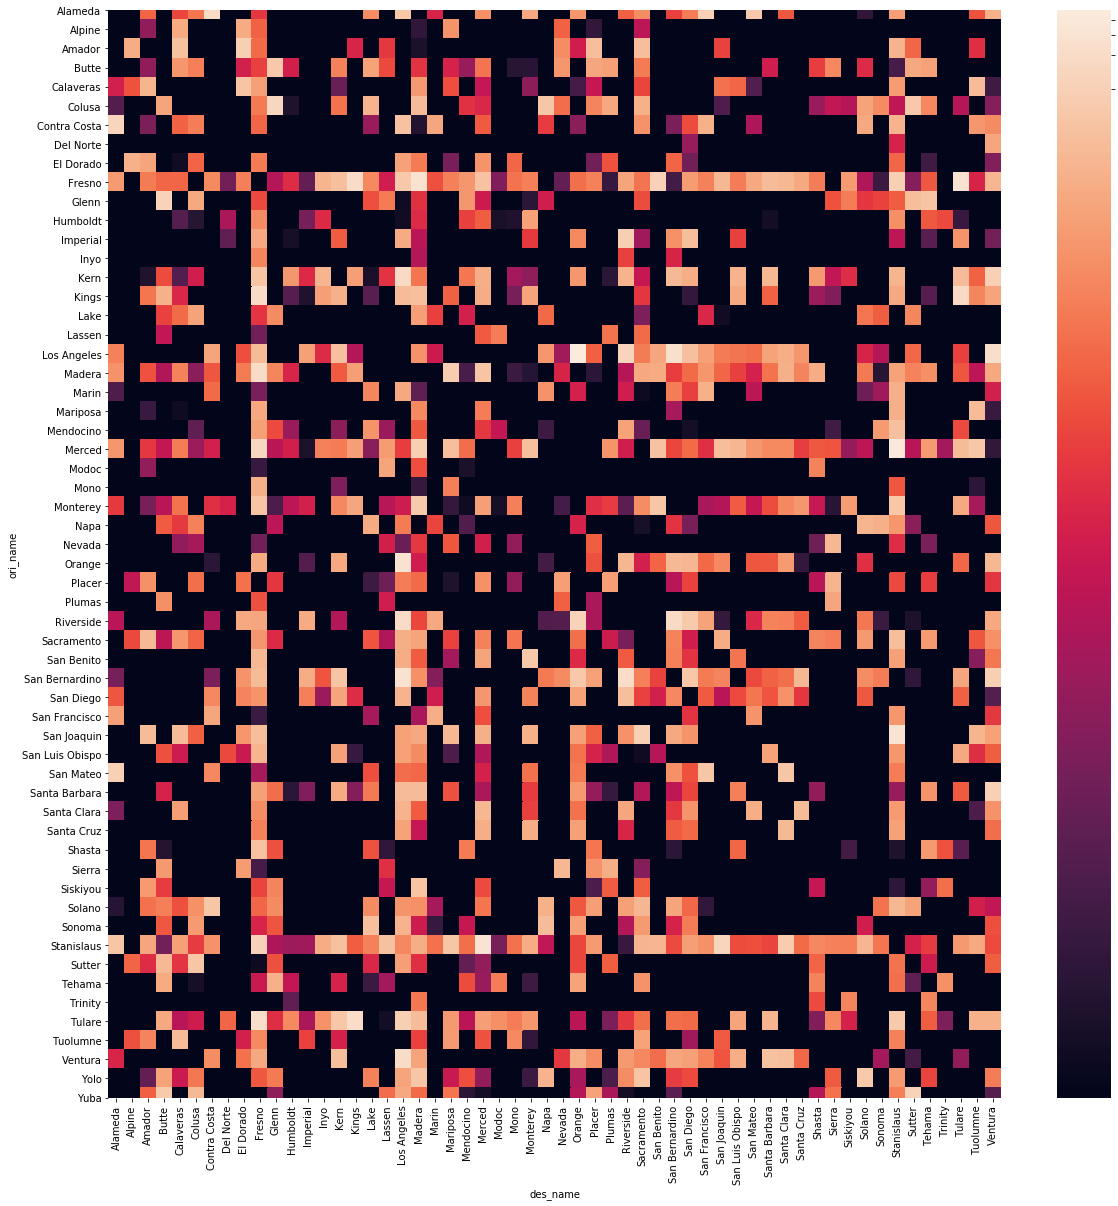

In [44]:
f,ax = plt.subplots(figsize= (20,20))
sns.heatmap(ca_matrix, linewidth=0, norm=LogNorm(vmin=ca_matrix.min().min(), vmax=ca_matrix.max().max()), ax=ax)
plt.show()

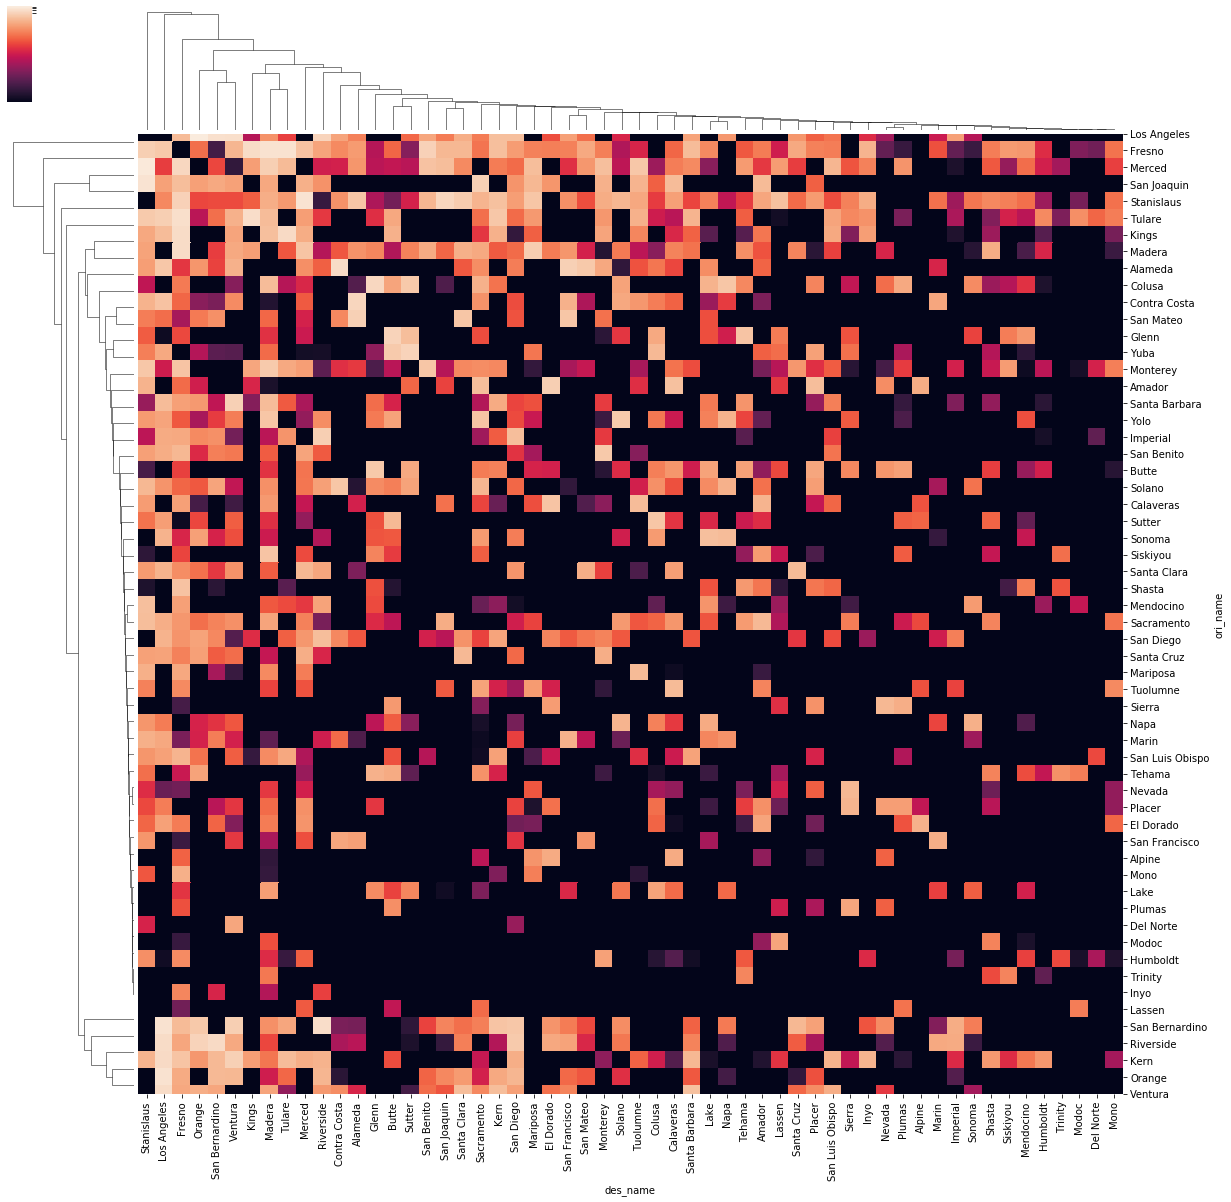

In [45]:
sns.clustermap(ca_matrix, figsize=(20,20), 
               norm = mpl.colors.LogNorm(vmin=ca_matrix.min().min(), vmax=ca_matrix.max().max()))

In [46]:
df_oglatlong = pd.read_csv('fips_latlong.csv')

In [47]:
df_stateflow = pd.read_csv('foodflow_data.csv')

In [48]:
df_oglatlong

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148
4,AL,1009,161530,Blount County,1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440
...,...,...,...,...,...,...,...,...,...,...
3215,PR,72145,1804553,Vega Baja Municipio,1.187451e+08,57827590,45.848,22.327,18.455128,-66.397883
3216,PR,72147,1804554,Vieques Municipio,1.315414e+08,552192819,50.788,213.203,18.125418,-65.432474
3217,PR,72149,1804555,Villalba Municipio,9.229857e+07,3622639,35.637,1.399,18.130718,-66.472244
3218,PR,72151,1804556,Yabucoa Municipio,1.430052e+08,72592516,55.215,28.028,18.059858,-65.859871


In [49]:
df_stateflow

,sctg_1,sctg_2,sctg_3,sctg_4,sctg_5,sctg_6,sctg_7,total,ori,des
0,0.000000e+00,0.0000,0.000000,4.763500e+04,149048.6442,0.0,40.262859,1.967239e+05,1001,1001
1,2.030100e+07,0.0000,0.000000,1.106758e+07,0.0000,0.0,0.000000,3.136858e+07,1001,1007
2,2.646100e+00,208558.0882,0.000000,6.272792e+07,219073.8700,0.0,21525.787040,6.317708e+07,1001,1021
3,0.000000e+00,0.0000,0.000000,8.156041e+06,0.0000,0.0,0.000000,8.156041e+06,1001,1037
4,0.000000e+00,0.0000,0.000000,0.000000e+00,0.0000,0.0,3400.448878,3.400449e+03,1001,1047
...,...,...,...,...,...,...,...,...,...,...
161389,0.000000e+00,0.0000,2.055448,5.196786e+05,0.0000,0.0,0.000000,5.196806e+05,56045,56011
161390,3.357975e+06,0.0000,0.000000,0.000000e+00,0.0000,0.0,0.000000,3.357975e+06,56045,56015
161391,3.253301e+03,0.0000,0.000000,0.000000e+00,0.0000,0.0,0.000000,3.253301e+03,56045,56019
161392,1.147379e+06,0.0000,0.000000,0.000000e+00,0.0000,0.0,0.000000,1.147379e+06,56045,56027


In [50]:
df_oglatlong.columns = df_oglatlong.columns.str.strip()

In [51]:
df_stateflow = df_stateflow.drop(['sctg_1','sctg_2','sctg_3','sctg_4','sctg_5','sctg_6','sctg_7'], axis=1)
df_oglatlong = df_oglatlong.drop(['ANSICODE','NAME','ALAND','AWATER','ALAND_SQMI','AWATER_SQMI','INTPTLAT','INTPTLONG'], 
                                 axis=1)

In [52]:
df_stateflow.groupby(df_stateflow.index).sum()

,total,ori,des
0,1.967239e+05,1001,1001
1,3.136858e+07,1001,1007
2,6.317708e+07,1001,1021
3,8.156041e+06,1001,1037
4,3.400449e+03,1001,1047
...,...,...,...
161389,5.196806e+05,56045,56011
161390,3.357975e+06,56045,56015
161391,3.253301e+03,56045,56019
161392,1.147379e+06,56045,56027


In [53]:
df_stateflow.rename(columns={'des': 'GEOID'}, inplace=True)

In [54]:
df_stateflow = pd.merge(df_oglatlong, df_stateflow)

In [55]:
df_stateflow.columns = df_stateflow.columns.str.strip()

In [56]:
df_stateflow.rename(columns=
                    {'GEOID':'des','INTPTLAT':'des_lat','INTPTLONG':'des_long', 'USPS':'USPS_des'}, inplace=True)

In [57]:
df_stateflow

,USPS_des,des,total,ori
0,AL,1001,1.967239e+05,1001
1,AL,1001,1.305280e+08,1021
2,AL,1001,2.590144e+04,1047
3,AL,1001,3.385408e+04,1051
4,AL,1001,3.370186e+06,1073
...,...,...,...,...
161389,WY,56045,2.051043e+07,56011
161390,WY,56045,2.538325e+05,56025
161391,WY,56045,6.689133e+01,56027
161392,WY,56045,4.672060e+05,56031


In [58]:
df_stateflow.rename(columns={'ori': 'GEOID'}, inplace=True)
df_stateflow = pd.merge(df_oglatlong, df_stateflow, on='GEOID')

In [59]:
df_stateflow.columns = df_stateflow.columns.str.strip()
df_stateflow.rename(columns=
                    {'GEOID':'ori','INTPTLAT':'ori_lat','INTPTLONG':'ori_long', 'USPS':'USPS_ori'}, inplace=True)

In [60]:
df_stateflow

,USPS_ori,ori,USPS_des,des,total
0,AL,1001,AL,1001,1.967239e+05
1,AL,1001,AL,1007,3.136858e+07
2,AL,1001,AL,1021,6.317708e+07
3,AL,1001,AL,1037,8.156041e+06
4,AL,1001,AL,1047,3.400449e+03
...,...,...,...,...,...
161389,WY,56045,WY,56011,5.196806e+05
161390,WY,56045,WY,56015,3.357975e+06
161391,WY,56045,WY,56019,3.253301e+03
161392,WY,56045,WY,56027,1.147379e+06


In [61]:
df_stateflow.to_csv('df_stateflow.csv')

In [62]:
stateflow_matrix = df_stateflow.pivot_table(index='USPS_ori', columns='USPS_des', values='total', aggfunc='sum')
stateflow_matrix = stateflow_matrix.fillna(0)
stateflow_matrix = stateflow_matrix+1

In [63]:
stateflow_matrix
np.fill_diagonal(stateflow_matrix.values, 1)

In [64]:
stateflow_matrix.to_csv('stateflow_matrix.csv')

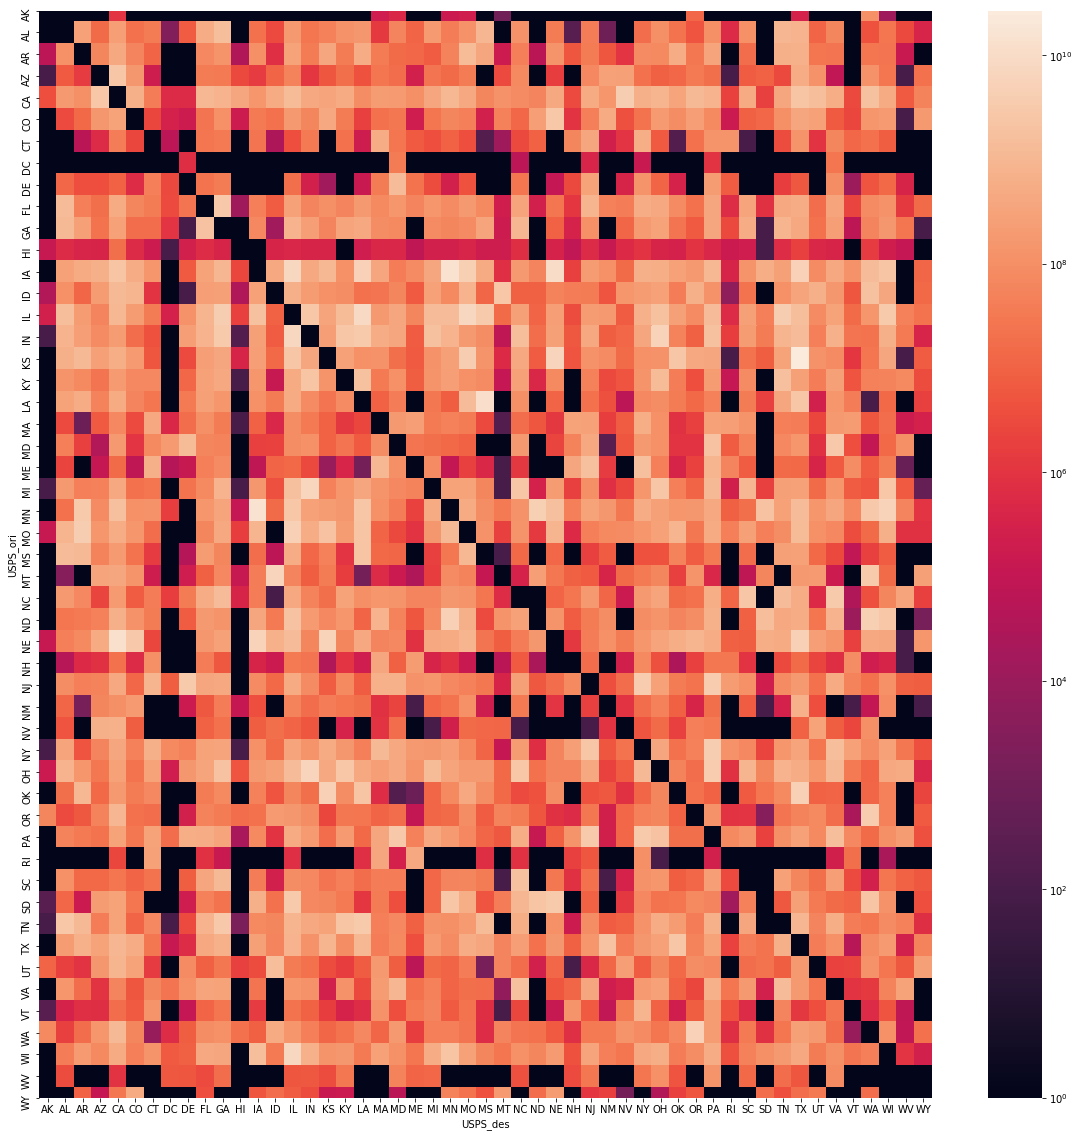

In [65]:
f,ax = plt.subplots(figsize= (20,20))
sns.heatmap(stateflow_matrix, linewidth=0, norm=LogNorm(vmin=stateflow_matrix.min().min(), vmax=stateflow_matrix.max().max()), ax = ax, 
            cbar_kws={"ticks":[0,1,1e2,1e4,1e6,1e8,1e10]})
plt.show()

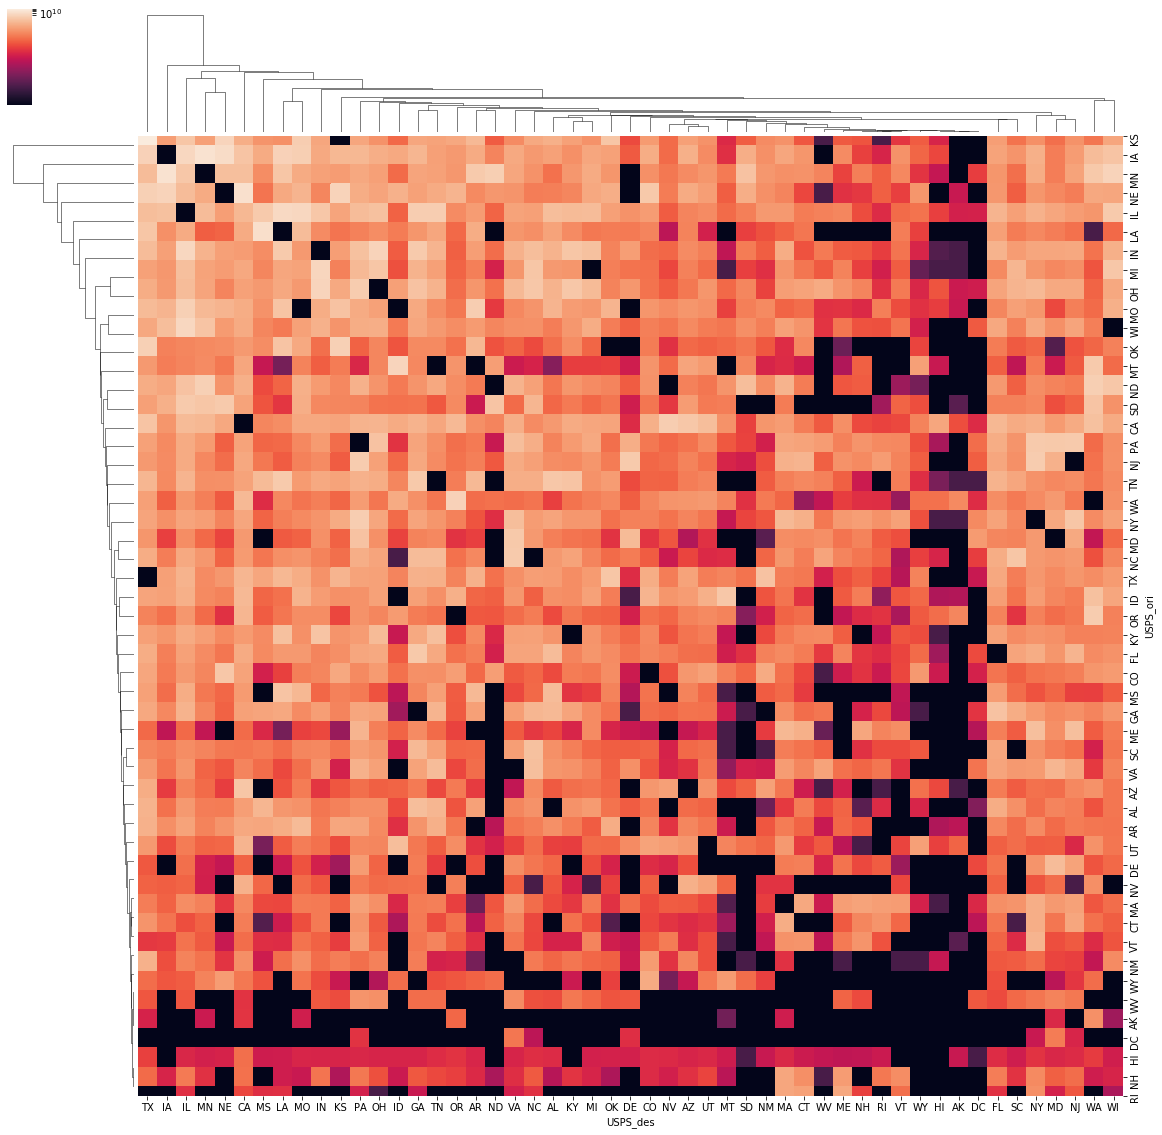

In [66]:
sns.clustermap(stateflow_matrix, figsize=(20,20), 
              norm = mpl.colors.LogNorm(vmin=stateflow_matrix.min().min(), vmax=stateflow_matrix.max().max()))